<a href="https://colab.research.google.com/github/jhyela/pregunta-SMART/blob/main/Analisis_Bivariado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Descripción del Dataset**
El resultado del examen saber Pro define un ranking de las instituciones universitarias a nivel nacional al mismo tiempo que promueve el mejoramiento de la calidad de los programas de educación superior. Para la universidad Icesi es muy importante el resultado de estas variables MOD_RAZONA_CUANTITAT_PUNT y MOD_COMUNI_ESCRITA_PUNT, dado que es uno de los 5 pilares de la prueba saber Pro y da una idea de la calidad de programas de pregrado y de la preparación académica de sus estudiantes.


#**Analisis Bivariado del dataset**

**Columnas seleccionadas** :

*   MOD_RAZONA_CUANTITAT_PUNT
*   MOD_COMUNI_ESCRITA_PUNT





In [7]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
drive.mount("/content/drive", force_remount=True)
df =pd.read_csv("drive/MyDrive/Analitica/Resultados__nicos_Saber_Pro_20240809.csv")

Mounted at /content/drive


Se crea el dataset con las columnas seleccionadas y
 se reasignan indices.

In [64]:
datos = df[['ESTU_PRGM_ACADEMICO','MOD_RAZONA_CUANTITAT_PUNT','MOD_COMUNI_ESCRITA_PUNT']][(df['INST_COD_INSTITUCION'] == 1828) & (df['PERIODO'] == 20203)]

datos.reset_index(drop=True, inplace=True)

datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ESTU_PRGM_ACADEMICO        1129 non-null   object 
 1   MOD_RAZONA_CUANTITAT_PUNT  1129 non-null   int64  
 2   MOD_COMUNI_ESCRITA_PUNT    1129 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 26.6+ KB


Analisis estadistico de las columnas seleccionadas.

In [65]:
datos.describe()

,MOD_RAZONA_CUANTITAT_PUNT,MOD_COMUNI_ESCRITA_PUNT
count,1129.000000,1129.000000
mean,179.138175,166.100974
std,26.380845,43.094965
min,88.000000,0.000000
25%,162.000000,139.000000
50%,181.000000,170.000000
75%,198.000000,186.000000
max,300.000000,300.000000


Histogramas de las columnas seleccionadas


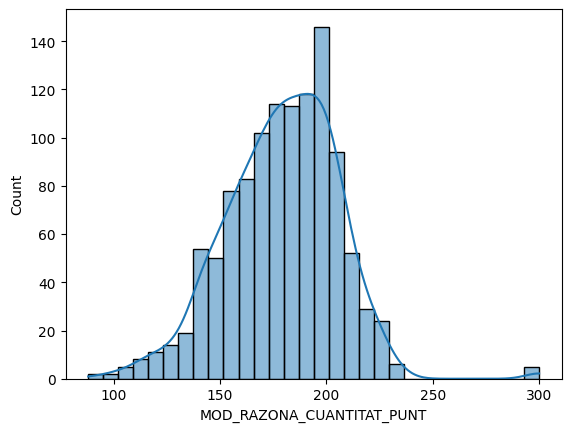

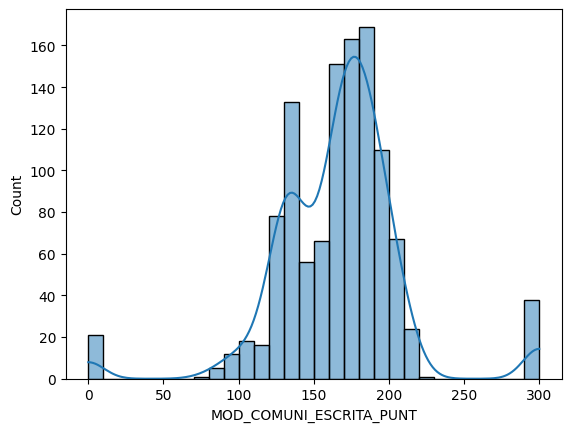

In [66]:

import matplotlib.pyplot as plt
sns.histplot(data=datos, x='MOD_RAZONA_CUANTITAT_PUNT',kde=True, bins=30)
plt.show()
sns.histplot(data=datos, x='MOD_COMUNI_ESCRITA_PUNT',kde=True, bins=30)
plt.show()


Boxplot de las columnas seleccionadas


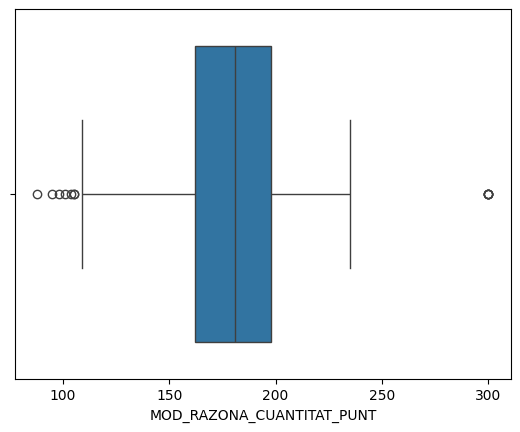

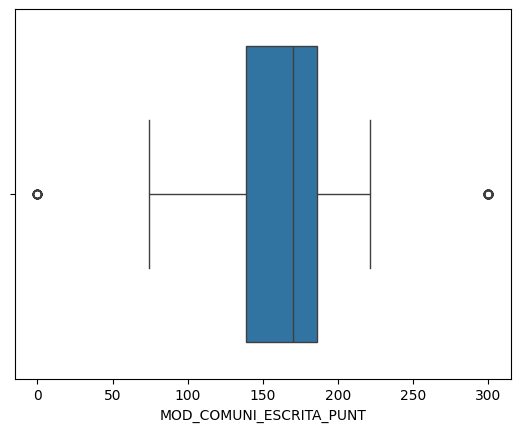

In [67]:
import matplotlib.pyplot as plt
sns.boxplot(data=datos, x='MOD_RAZONA_CUANTITAT_PUNT')
plt.show()
sns.boxplot(data=datos, x='MOD_COMUNI_ESCRITA_PUNT')
plt.show()


Se realiza limpieza de datos atipicos

In [72]:
# Identificar valores atípicos utilizando el rango intercuartil (IQR)
Q1 = datos['MOD_RAZONA_CUANTITAT_PUNT'].quantile(0.25)
Q3 = datos['MOD_RAZONA_CUANTITAT_PUNT'].quantile(0.75)
IQR = Q3 - Q1

# Valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

datos = datos[(datos['MOD_RAZONA_CUANTITAT_PUNT'] >= limite_inferior) & (datos['MOD_RAZONA_CUANTITAT_PUNT'] <= limite_superior)]

#--
Q1 = datos['MOD_COMUNI_ESCRITA_PUNT'].quantile(0.25)
Q3 = datos['MOD_COMUNI_ESCRITA_PUNT'].quantile(0.75)
IQR = Q3 - Q1

# Valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

datos = datos[(datos['MOD_COMUNI_ESCRITA_PUNT'] >= limite_inferior) & (datos['MOD_COMUNI_ESCRITA_PUNT'] <= limite_superior)]



Bloxplot con datos limpios

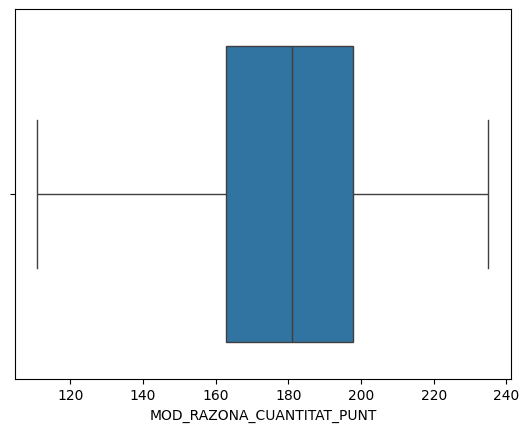

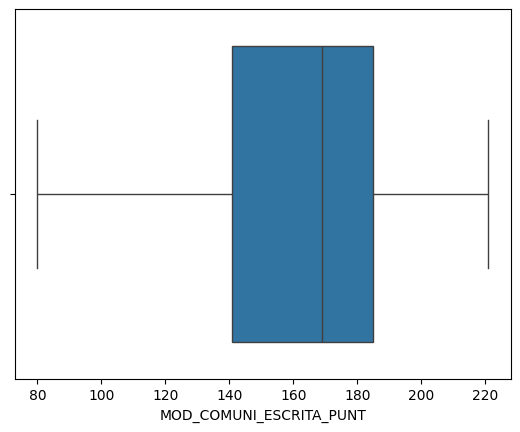

In [73]:
import matplotlib.pyplot as plt
sns.boxplot(data=datos, x='MOD_RAZONA_CUANTITAT_PUNT')
plt.show()
sns.boxplot(data=datos, x='MOD_COMUNI_ESCRITA_PUNT')
plt.show()

Diagrama de puntos

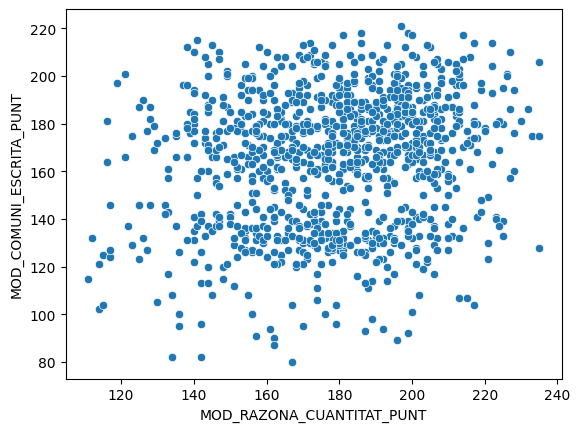

In [74]:

import matplotlib.pyplot as plt
sns.scatterplot(x='MOD_RAZONA_CUANTITAT_PUNT', y='MOD_COMUNI_ESCRITA_PUNT', data=datos)
plt.show()


Diagrama de puntos discriminado visualido por programa

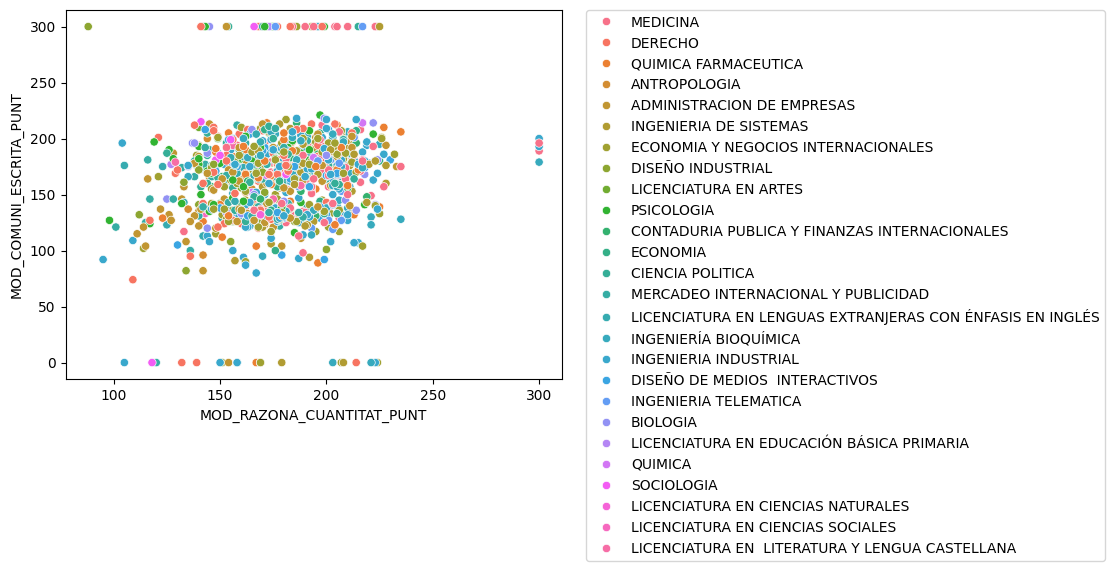

In [61]:

sns.scatterplot(x='MOD_RAZONA_CUANTITAT_PUNT', y='MOD_COMUNI_ESCRITA_PUNT', hue='ESTU_PRGM_ACADEMICO', data=datos)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

Diagramas de calor

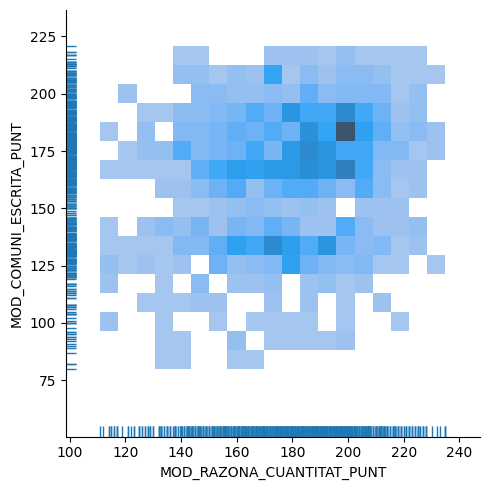

In [75]:
from pickle import TRUE

import matplotlib.pyplot as plt
sns.displot(data=datos, x='MOD_RAZONA_CUANTITAT_PUNT', y='MOD_COMUNI_ESCRITA_PUNT', rug='TRUE')
plt.show()


Grafico de correlaciones

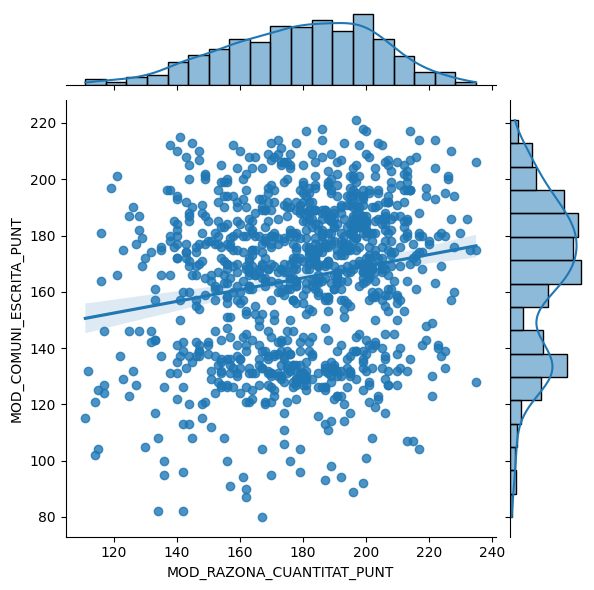

In [76]:
sns.jointplot(data = datos,
              x = "MOD_RAZONA_CUANTITAT_PUNT",
              y = "MOD_COMUNI_ESCRITA_PUNT",
              kind='reg')

In [100]:
import matplotlib.pyplot as plt

datos1= datos.drop(columns=['ESTU_PRGM_ACADEMICO'])
datos1.corr()



,MOD_RAZONA_CUANTITAT_PUNT,MOD_COMUNI_ESCRITA_PUNT
MOD_RAZONA_CUANTITAT_PUNT,1.000000,0.180965
MOD_COMUNI_ESCRITA_PUNT,0.180965,1.000000


- El resultado de la correlación muestra que hay una correlación positiva debil entre el resultado del modulo de razonamiento cuantitativo y comunicación escrita.


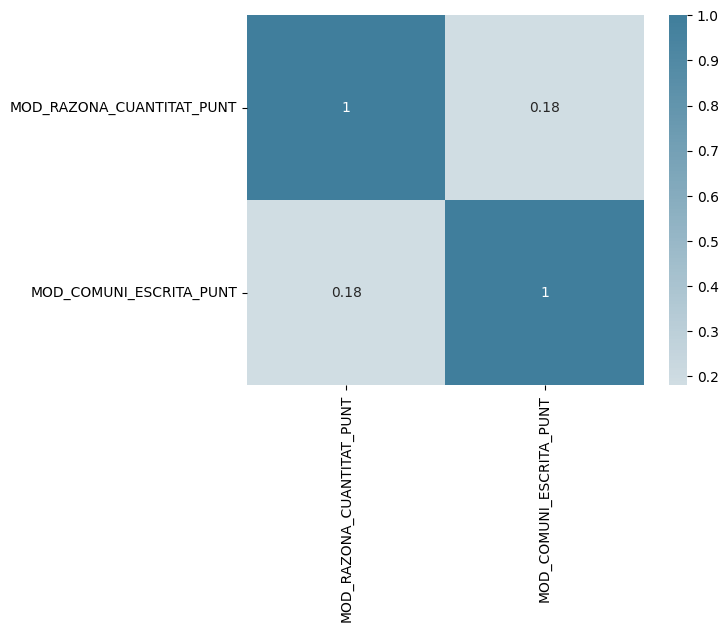

In [94]:
sns.heatmap( data = datos1.corr(), cmap= sns.diverging_palette(20,230,as_cmap='TRUE'),center = 0, annot=True)
plt.show()


In [134]:
# Calcular correlaciones por programa académico
correlaciones = datos.groupby('ESTU_PRGM_ACADEMICO').corr()

correlaciones.describe()
correlaciones.info()
correlaciones.head(52)


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 52 entries, ('ADMINISTRACION DE EMPRESAS', 'MOD_RAZONA_CUANTITAT_PUNT') to ('SOCIOLOGIA', 'MOD_COMUNI_ESCRITA_PUNT')
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MOD_RAZONA_CUANTITAT_PUNT  48 non-null     float64
 1   MOD_COMUNI_ESCRITA_PUNT    48 non-null     float64
dtypes: float64(2)
memory usage: 2.4+ KB


MOD_RAZONA_CUANTITAT_PUNT  \
ESTU_PRGM_ACADEMICO                                                                                       
ADMINISTRACION DE EMPRESAS                         MOD_RAZONA_CUANTITAT_PUNT                   1.000000   
                                                   MOD_COMUNI_ESCRITA_PUNT                     0.477589   
ANTROPOLOGIA                                       MOD_RAZONA_CUANTITAT_PUNT                   1.000000   
                                                   MOD_COMUNI_ESCRITA_PUNT                     0.221959   
BIOLOGIA                                           MOD_RAZONA_CUANTITAT_PUNT                   1.000000   
                                                   MOD_COMUNI_ESCRITA_PUNT                     0.083452   
CIENCIA POLITICA                                   MOD_RAZONA_CUANTITAT_PUNT                   1.000000   
                                                   MOD_COMUNI_ESCRITA_PUNT                    -0.177361   
CONTADURIA PUBLICA Y FINANZAS INTERNACIONALES      MOD_RAZONA_CUANTITAT_PUNT                   1.000000   
                                                   MOD_COMUNI_ESCRITA_PUNT                     0.059001   
DERECHO                                            MOD_RAZONA_CUANTITAT_PUNT                   1.000000   
                                                   MOD_COMUNI_ESCRITA_PUNT                     0.308289   
DISEÑO DE MEDIOS  INTERACTIVOS                     MOD_RAZONA_CUANTITAT_PUNT                   1.000000   
                                                   MOD_COMUNI_ESCRITA_PUNT                     0.067237   
DISEÑO INDUSTRIAL                                  MOD_RAZONA_CUANTITAT_PUNT                   1.000000   
                                                   MOD_COMUNI_ESCRITA_PUNT                     0.162551   
ECONOMIA                                           MOD_RAZONA_CUANTITAT_PUNT                   1.000000   
                                                   MOD_COMUNI_ESCRITA_PUNT                     0.320880   
ECONOMIA Y NEGOCIOS INTERNACIONALES                MOD_RAZONA_CUANTITAT_PUNT                   1.000000   
                                                   MOD_COMUNI_ESCRITA_PUNT                     0.178669   
INGENIERIA DE SISTEMAS                             MOD_RAZONA_CUANTITAT_PUNT                   1.000000   
                                                   MOD_COMUNI_ESCRITA_PUNT                     0.340554   
INGENIERIA INDUSTRIAL                              MOD_RAZONA_CUANTITAT_PUNT                   1.000000   
                                                   MOD_COMUNI_ESCRITA_PUNT                     0.236097   
INGENIERIA TELEMATICA                              MOD_RAZONA_CUANTITAT_PUNT                   1.000000   
                                                   MOD_COMUNI_ESCRITA_PUNT                     0.037198   
INGENIERÍA BIOQUÍMICA                              MOD_RAZONA_CUANTITAT_PUNT                   1.000000   
                                                   MOD_COMUNI_ESCRITA_PUNT                    -0.087015   
LICENCIATURA EN  LITERATURA Y LENGUA CASTELLANA    MOD_RAZONA_CUANTITAT_PUNT                   1.000000   
                                                   MOD_COMUNI_ESCRITA_PUNT                    -0.357263   
LICENCIATURA EN ARTES                              MOD_RAZONA_CUANTITAT_PUNT                        NaN   
                                                   MOD_COMUNI_ESCRITA_PUNT                          NaN   
LICENCIATURA EN CIENCIAS NATURALES                 MOD_RAZONA_CUANTITAT_PUNT                   1.000000   
                                                   MOD_COMUNI_ESCRITA_PUNT                    -1.000000   
LICENCIATURA EN CIENCIAS SOCIALES                  MOD_RAZONA_CUANTITAT_PUNT                        NaN   
                                                   MOD_COMUNI_ESCRITA_PUNT                          NaN   
LICENCIATURA

In [135]:
correlaciones[correlaciones['MOD_COMUNI_ESCRITA_PUNT'].isnull()]


MOD_RAZONA_CUANTITAT_PUNT  \
ESTU_PRGM_ACADEMICO                                                                      
LICENCIATURA EN ARTES             MOD_RAZONA_CUANTITAT_PUNT                        NaN   
                                  MOD_COMUNI_ESCRITA_PUNT                          NaN   
LICENCIATURA EN CIENCIAS SOCIALES MOD_RAZONA_CUANTITAT_PUNT                        NaN   
                                  MOD_COMUNI_ESCRITA_PUNT                          NaN   

                                                             MOD_COMUNI_ESCRITA_PUNT  
ESTU_PRGM_ACADEMICO                                                                   
LICENCIATURA EN ARTES             MOD_RAZONA_CUANTITAT_PUNT                      NaN  
                                  MOD_COMUNI_ESCRITA_PUNT                        NaN  
LICENCIATURA EN CIENCIAS SOCIALES MOD_RAZONA_CUANTITAT_PUNT                      NaN  
                                  MOD_COMUNI_ESCRITA_PUNT                        NaN

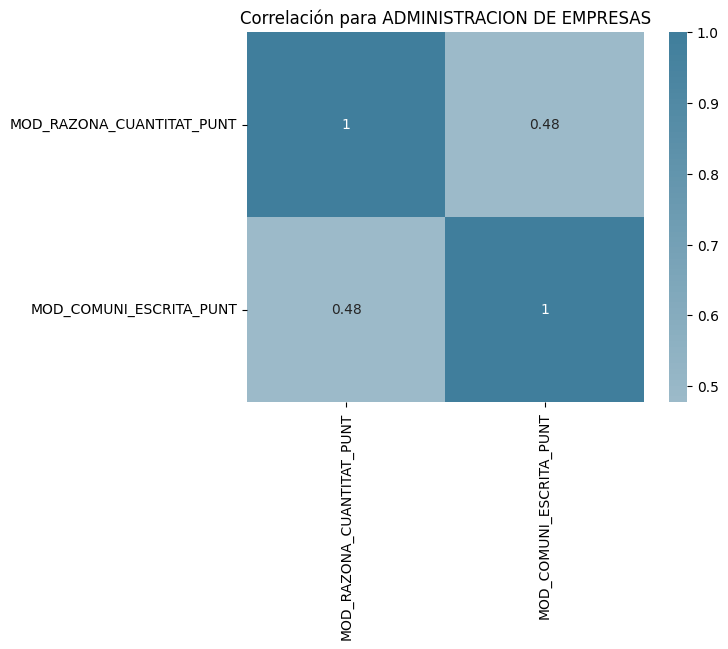

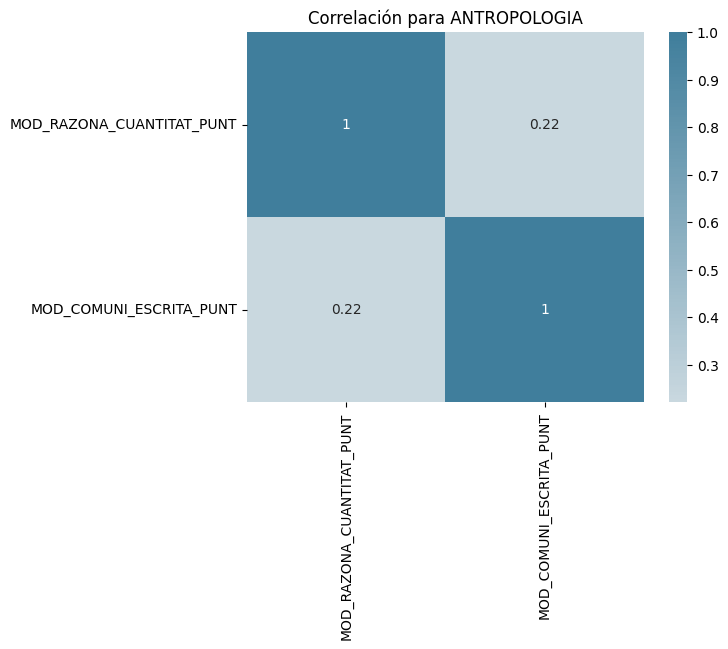

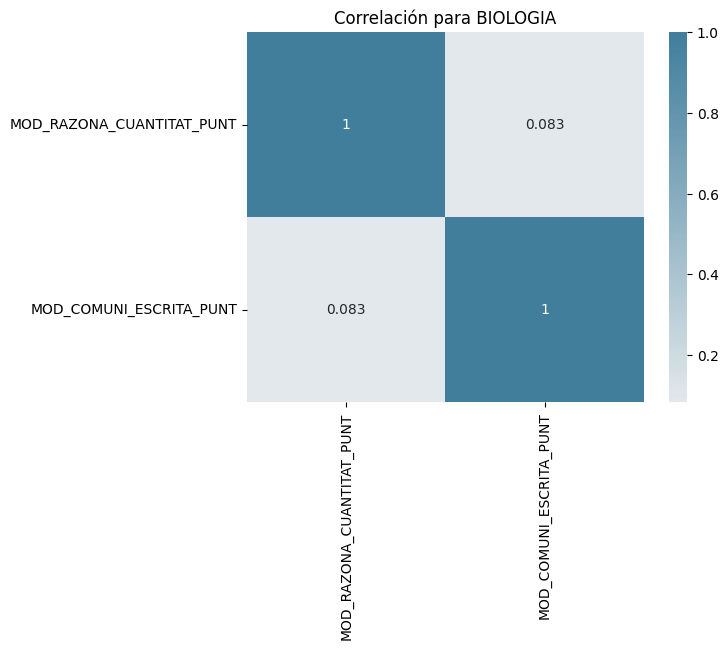

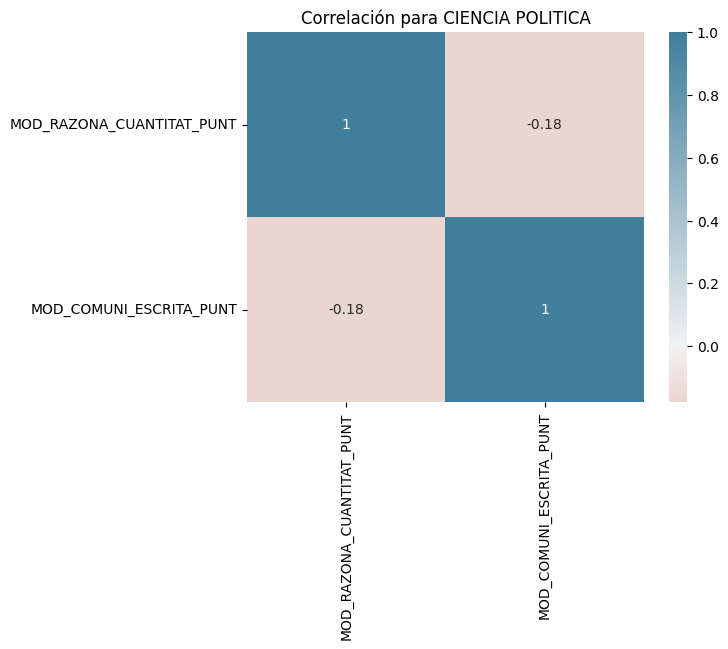

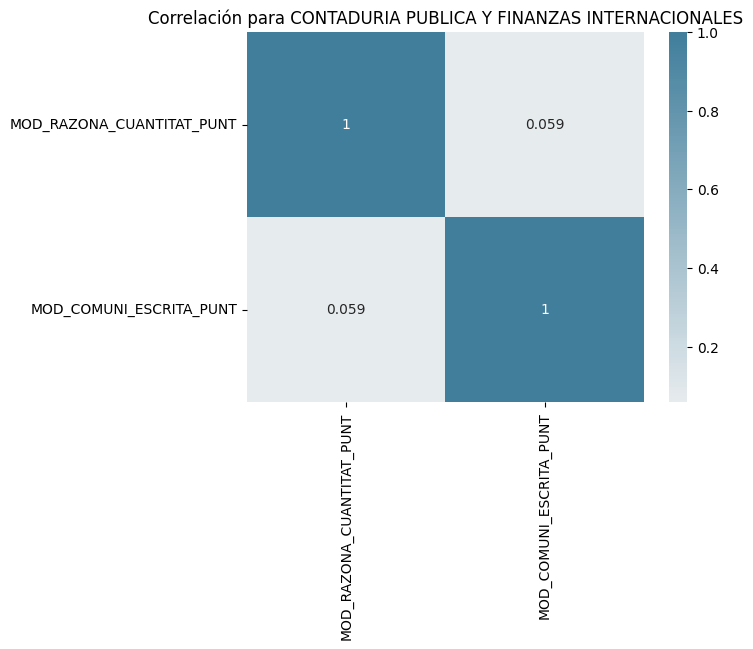

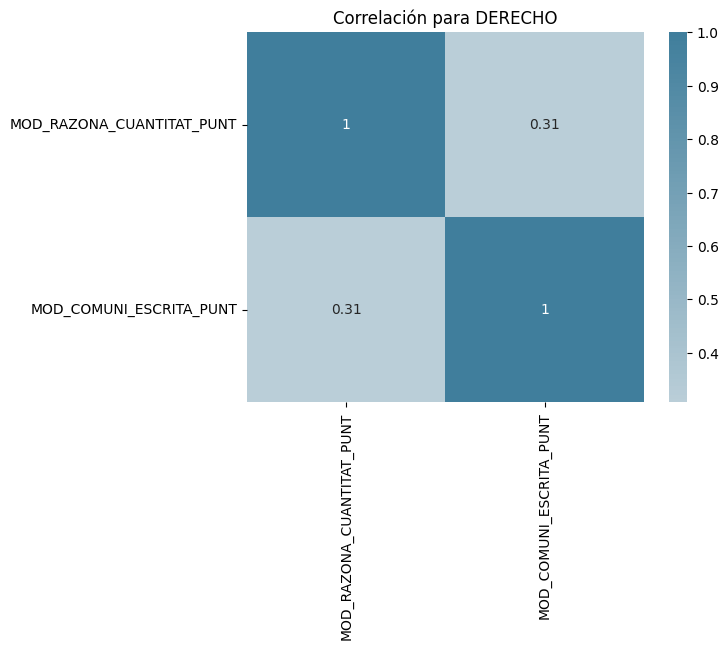

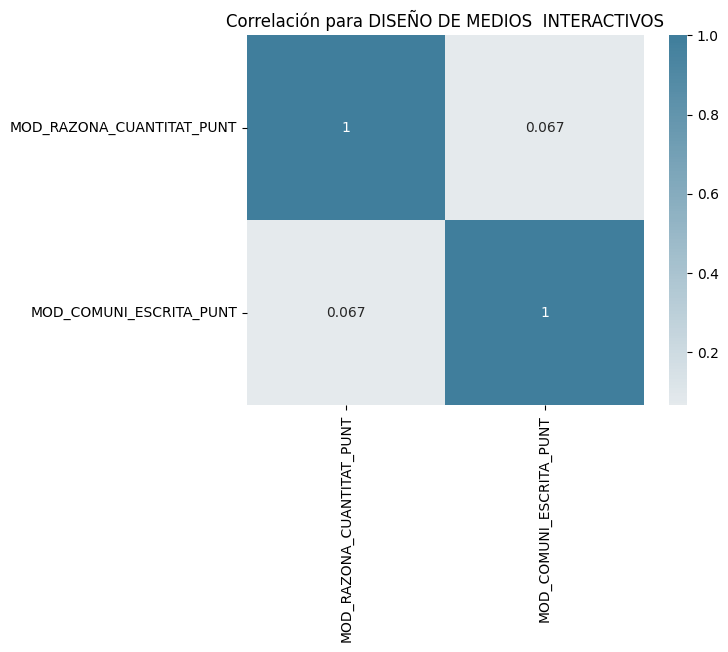

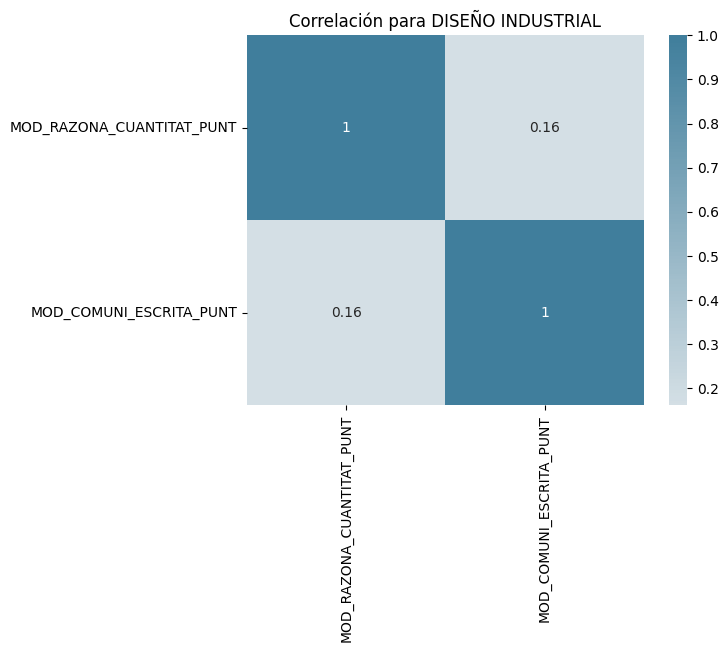

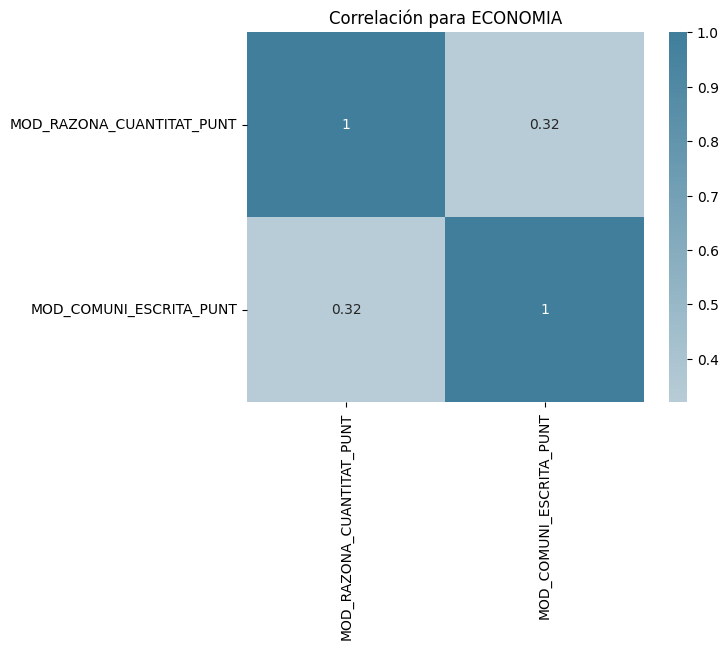

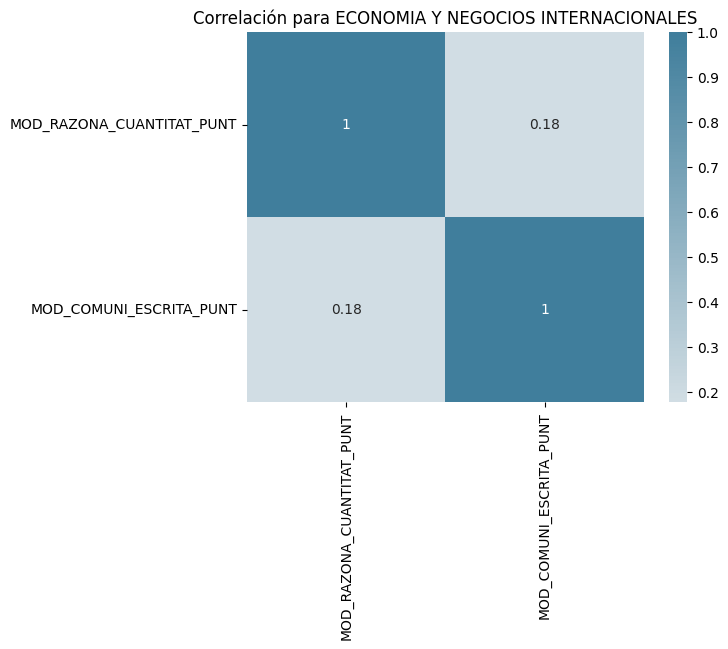

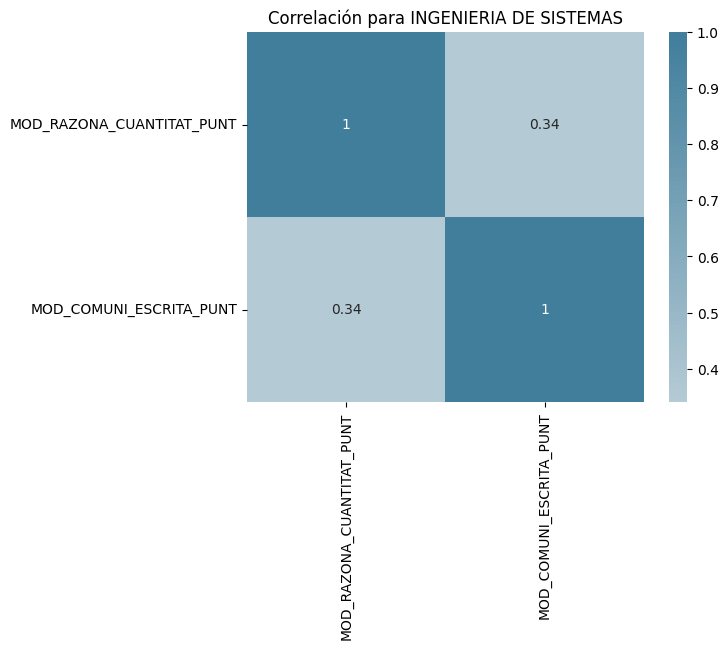

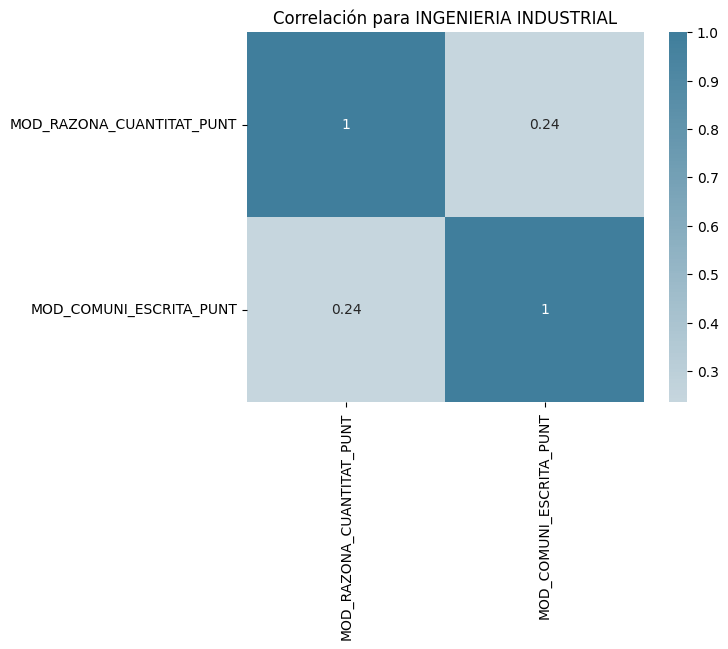

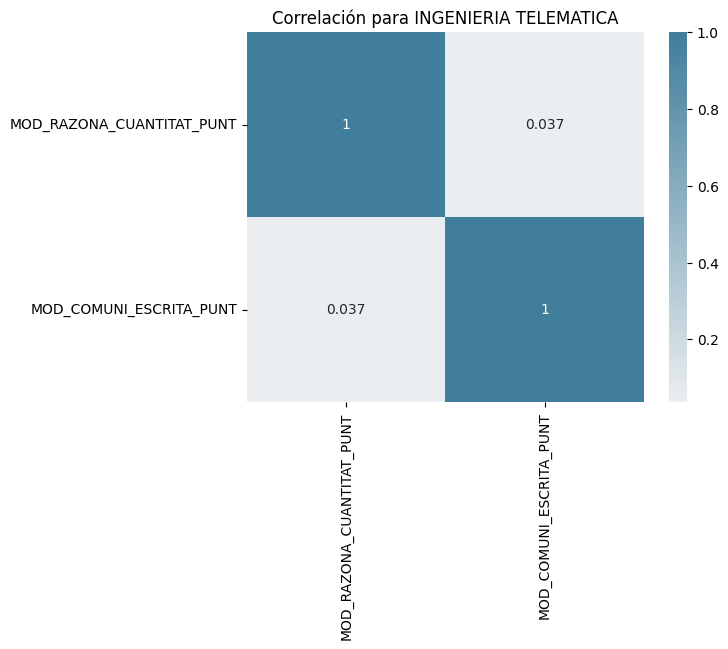

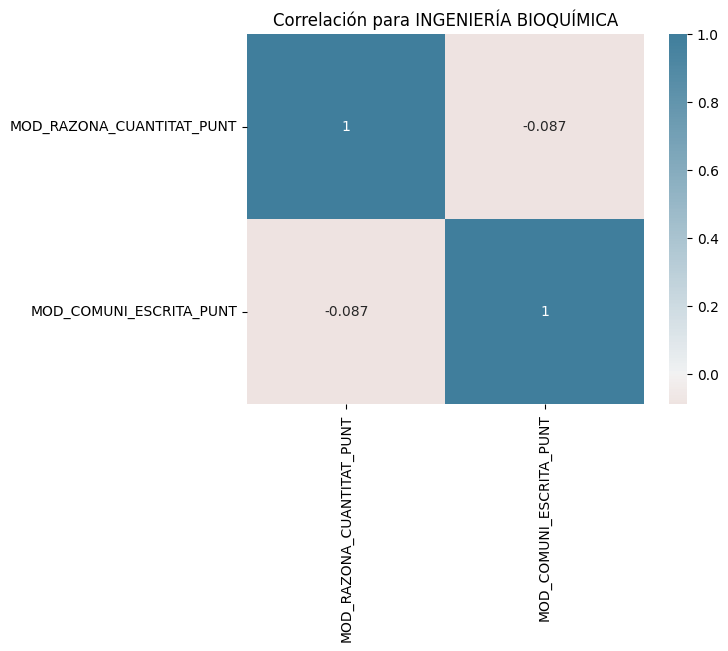

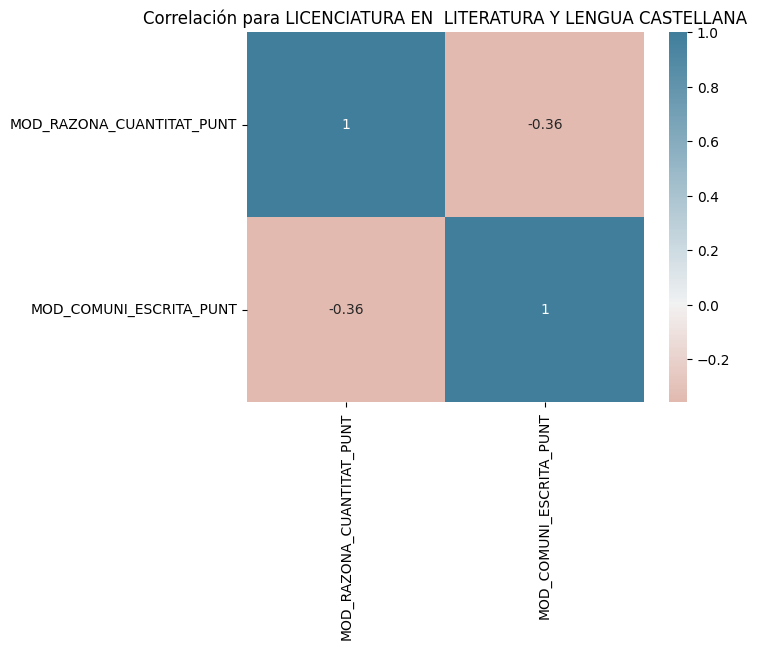

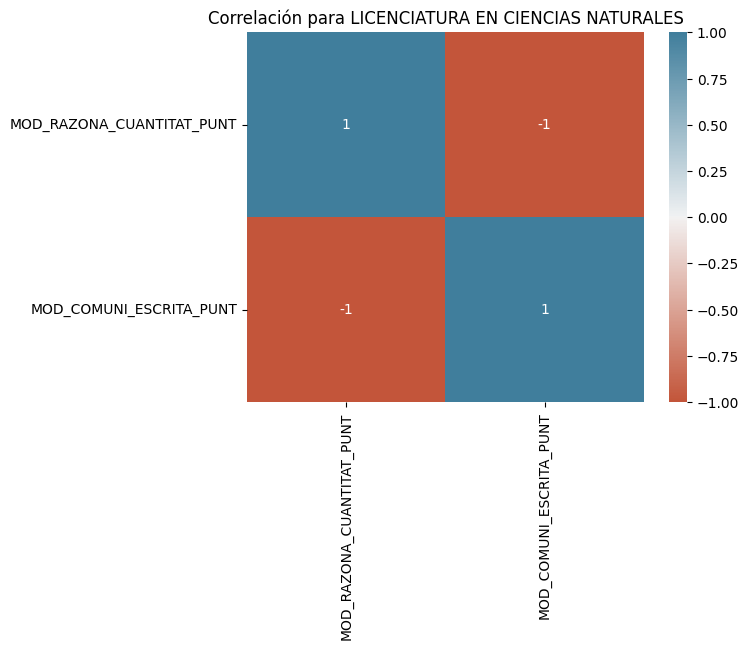

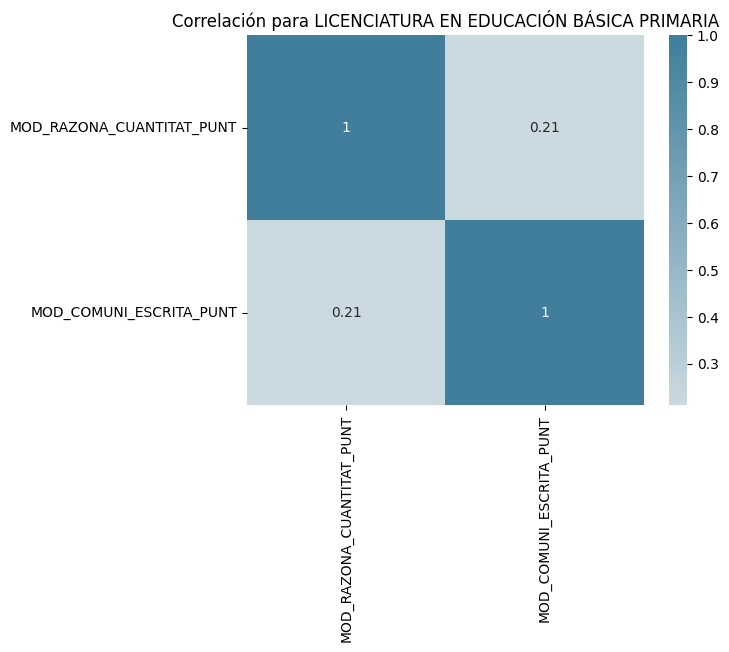

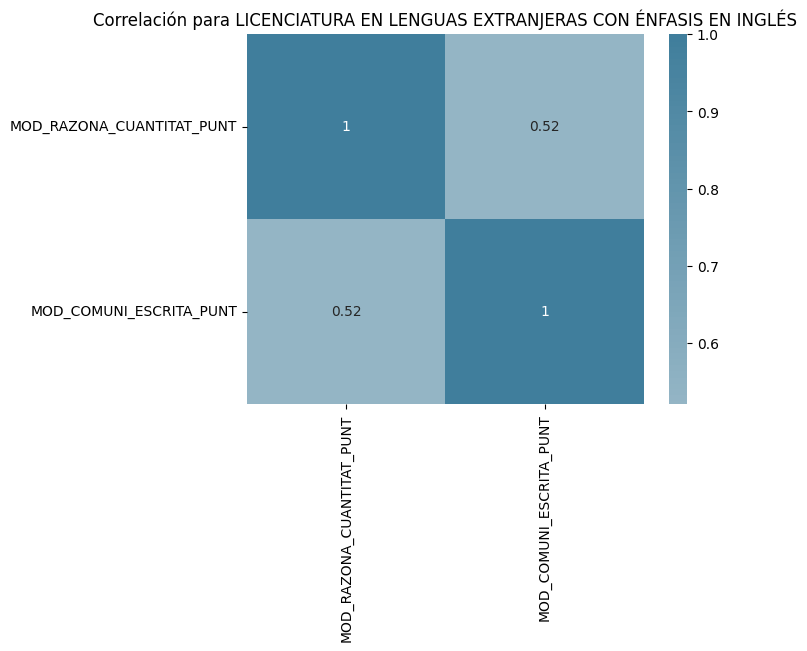

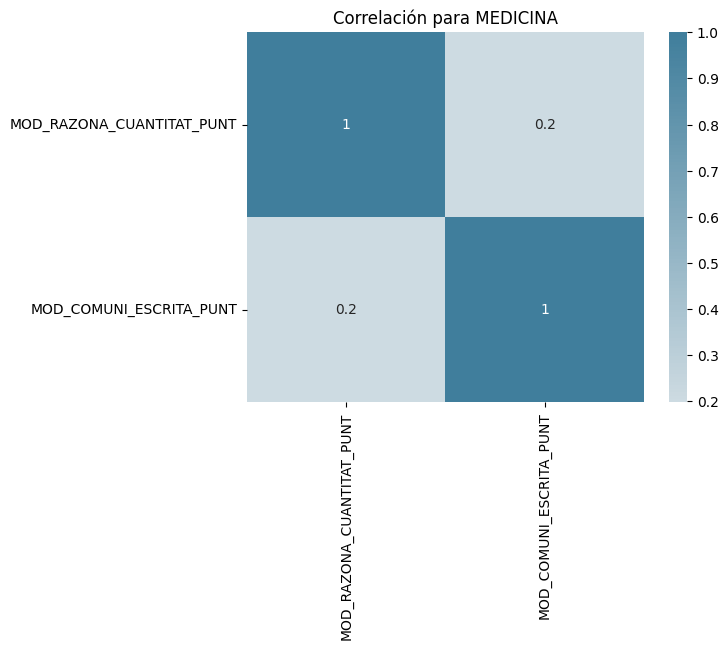

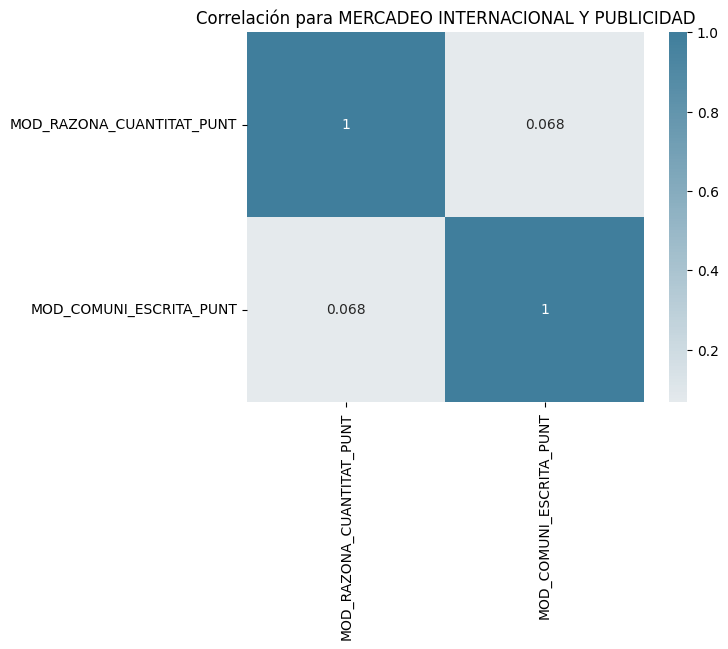

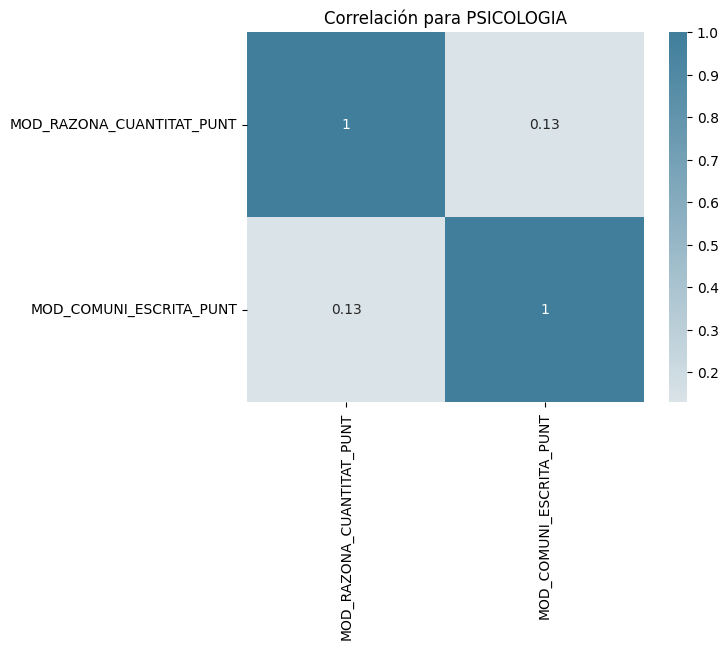

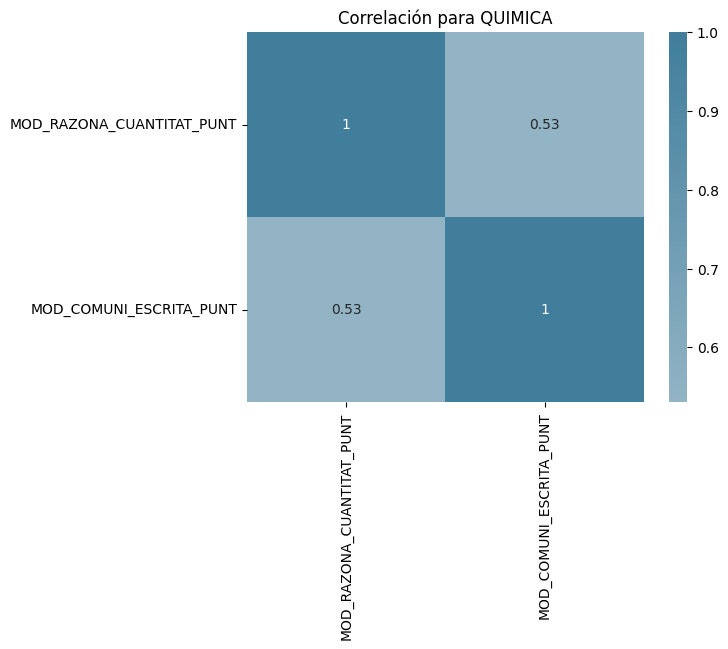

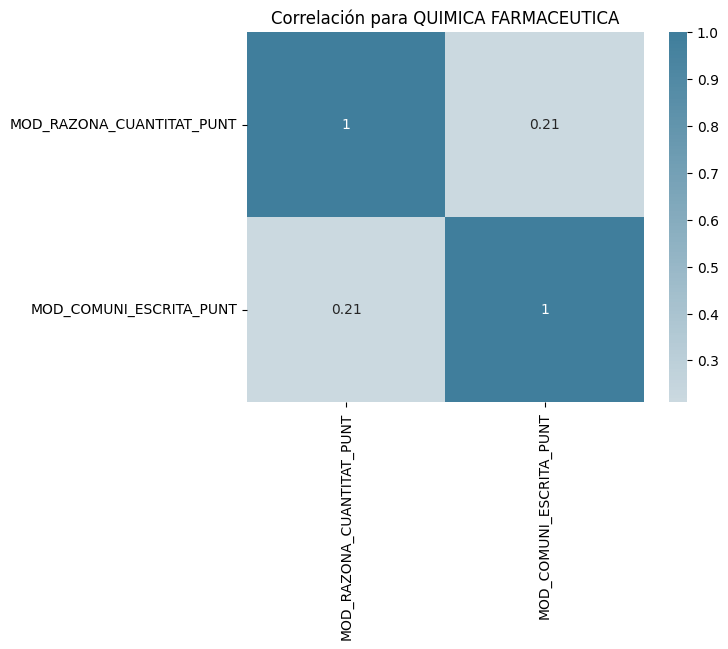

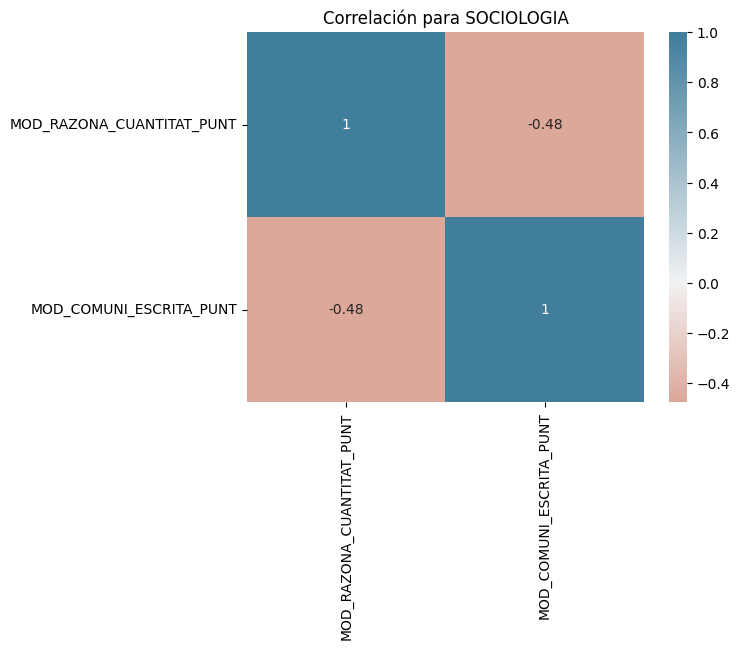

In [136]:
# prompt: por cada programa en dataset correlaciones heatmap

import matplotlib.pyplot as plt

correlaciones.dropna(inplace=True)

for programa in correlaciones.index.get_level_values(0).unique():
  df_temp = correlaciones.loc[programa]
  sns.heatmap(data=df_temp, cmap=sns.diverging_palette(20, 230, as_cmap=True), center=0, annot=True)
  plt.title(f"Correlación para {programa}")
  plt.show()


#**Conclusiones del analisis Bivariado**

El analisis de correlaciones nos muestrea que existe una correlación positiva débil entre los resultados del módulo de razonamiento cuantitativo y el módulo de comunicación escrita, lo que se puede entender como que los estudiantes que obtienen un buen resultado en en razonamiento cuantitativo tienden a tener un desempeño ligeramente mejor en la otra prueba.

Entre los distintos programas, no se logra ver una relacion clara entre el resultado de la prueba de analisis cuantitativo y cominicacion escrita.

La correlacion entre el desempeño de la prueba de analisis cuantitativo y cominicacion escrita es positiva debil de 0.18.

Se debe realizar un analisis estadistico para concluir si los datos de los resultados de las pruebas de analisis cuantitativo y cominicacion escrita  estan significativamente relacionados entre si.


